In [271]:
# Connecting_Drive
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
# Access a file (give the path according to your file's location)
file_path = '/content/drive/My Drive/Machine learning/machine failure.csv'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Machine learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Machine learning/'


In [273]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [274]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [275]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [276]:
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Machine learning/machine failure.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [277]:
data.info() # get basic Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [278]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [279]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [280]:
target_counts = data['Machine failure'].value_counts() # failure instance analysis
print(target_counts)


0    9661
1     339
Name: Machine failure, dtype: int64


In [281]:
# finding categorical variable
def cat_var_checker(df, dtype='object'):
    """
    The categorical variable checker

    Parameters
    ----------
    df : the dataframe
    dtype : the data type categorical variables should have, 'object' by default
            i.e., if a variable has this data type, it should be a categorical variable

    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """

    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           # If the data type is dtype
                           for var in df.columns if df[var].dtype == dtype],
                          columns=['var', 'nunique'])

    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)

    return df_cat

In [282]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(data)

# Print the dataframe
df_cat

,var,nunique
0,Product ID,10000
1,Type,3


In [283]:
index_to_drop = 0
df_cat.drop(index=index_to_drop, inplace=True)

In [284]:
df_cat

,var,nunique
1,Type,3


In [285]:
# Ecoding categorical variable

# One-hot-encode the categorical features in the combined data
data = pd.get_dummies(data, columns=np.setdiff1d(df_cat['var'], ['Machine failure']))

# Print the first 5 rows of df
data.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [286]:
# Handling Identifiers
data.drop(columns='UDI', inplace=True)

In [287]:
# Handling Identifiers
data.drop(columns='Product ID', inplace=True)

In [288]:
data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


In [289]:
# Analyze categorical features
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(data[col].value_counts())


In [290]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.876107   
Process temperature [K]             0.876107                 1.000000   
Rotational speed [rpm]              0.022670                 0.019277   
Torque [Nm]                        -0.013778                -0.014061   
Tool wear [min]                     0.013853                 0.013488   
Machine failure                     0.082556                 0.035946   
TWF                                 0.009955                 0.007315   
HDF                                 0.137831                 0.056933   
PWF                                 0.003470                -0.003355   
OSF                                 0.001988                 0.004554   
RNF                                 0.017688                 0.022279   
Type_H                             -0.023025                -0.017967   
Type_L                              0.006676       

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

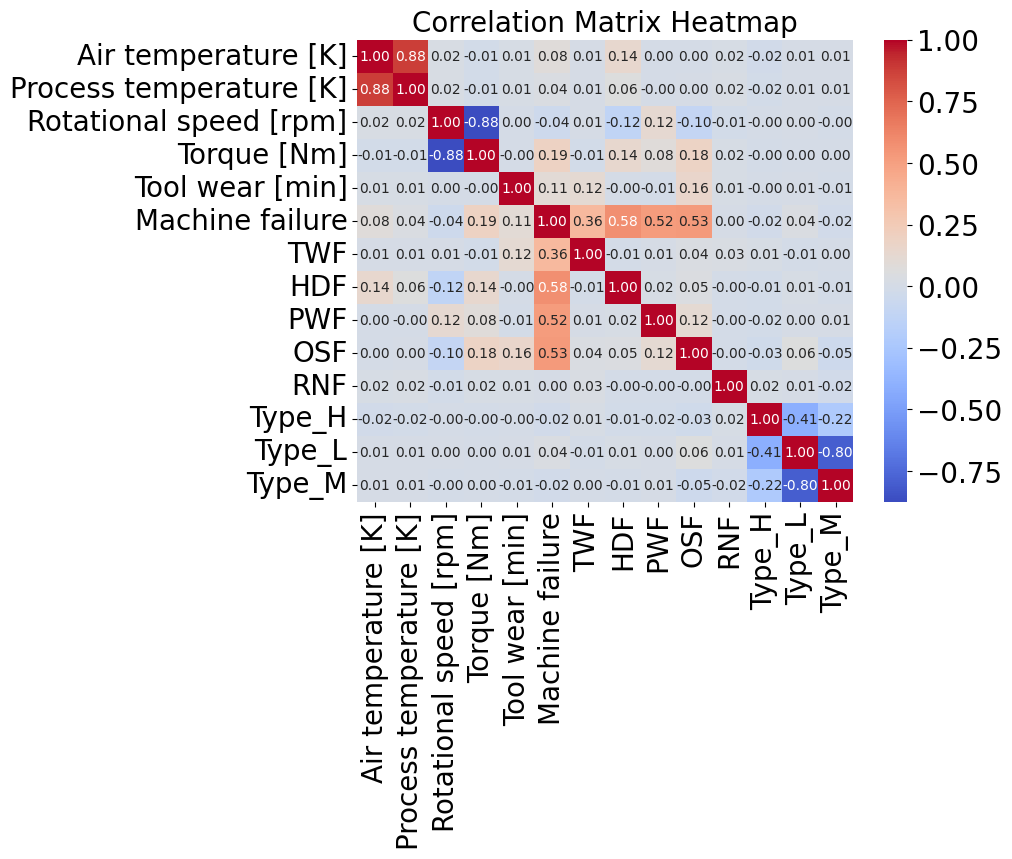

In [292]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [293]:
# Inorder to find the multicollinearity, VIF>5 is considered as highly collinear and should be avoided
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

                    Feature           VIF
0       Air temperature [K]      4.458555
1   Process temperature [K]      4.384014
2    Rotational speed [rpm]      5.173036
3               Torque [Nm]      5.236186
4           Tool wear [min]      1.039991
5           Machine failure     11.831941
6                       TWF      2.434125
7                       HDF      4.637338
8                       PWF      3.624663
9                       OSF      3.349584
10                      RNF      1.002529
11                   Type_H   4923.963576
12                   Type_L  29461.500954
13                   Type_M  14716.973269


In [294]:
# Spliting the data into train & test
from sklearn.model_selection import train_test_split

# Divide the data into training (60%) and test (40%)
data_train, data_test = train_test_split(data,
                                     train_size=0.6,
                                     random_state=random_seed,
                                     stratify=data['Machine failure'])

# Divide the test data into validation (50%) and test (50%)
data_val, data_test = train_test_split(data_test,
                                   train_size=0.5,
                                   random_state=random_seed,
                                   stratify=data_test['Machine failure'])

In [295]:
# Splitting the feature and target

# Get the feature matrix
X_train = data_train[np.setdiff1d(data_train.columns, ['Machine failure'])].values
X_val = data_val[np.setdiff1d(data_val.columns, ['Machine failure'])].values
X_test = data_test[np.setdiff1d(data_test.columns, ['Machine failure'])].values

# Get the target vector
y_train = data_train['Machine failure'].values
y_val = data_val['Machine failure'].values
y_test = data_test['Machine failure'].values

In [296]:
# Smot
from imblearn.over_sampling import SMOTE

# The SMOTE
smote = SMOTE(random_state=random_seed)

# Augment the training data
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [297]:
pd.Series(y_smote_train).value_counts()

0    5797
1    5797
dtype: int64

In [298]:
# See the implementation in pmlm_utilities.ipynb
y_smote_gen_ori_train = separate_generate_original(X_smote_train, y_smote_train, X_train, y_train, 1)

In [299]:
data_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
3736,302.2,311.1,1628,30.6,105,0,0,0,0,0,0,1,0,0
8772,297.5,308.6,1621,28.9,0,0,0,0,0,0,0,0,1,0
6622,301.7,310.7,1493,51.1,87,0,0,0,0,0,0,0,1,0
9000,297.0,307.9,1493,46.1,173,0,0,0,0,0,0,0,1,0
7604,300.4,311.3,1639,34.6,24,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,296.1,306.7,1409,42.8,134,0,0,0,0,0,0,0,1,0
4266,302.7,311.1,1440,39.5,146,0,0,0,0,0,0,0,1,0
7772,300.3,311.5,1464,41.0,29,0,0,0,0,0,0,1,0,0
5780,301.7,311.2,1517,42.4,113,0,0,0,0,0,0,0,1,0


In [300]:
# Hyper parameter tuning
# Change working directory to the absolute path of the shallow models folder
%cd $abspath_model_shallow

# Import the shallow models
%run pmlm_models_shallow.ipynb


%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Machine learning


In [301]:
from sklearn.linear_model import LogisticRegression

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'lr_mbgd': LogisticRegression_MBGD()}

In [302]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [303]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_smote_train, y_smote_train, X_val, y_val)

In [304]:
#Grid Search
param_grids = {}

In [305]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [306]:
# The parameter grid of tol
eta_grid = [10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
alpha_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr_mbgd'] = [{'model__eta': eta_grid,
                           'model__alpha': alpha_grid}]

In [307]:
# Make directory
directory = os.path.dirname(abspath_model_shallow + '/result/bcw/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [308]:
# Tuning the hyperparameters - The code below shows how to fine-tune the hyperparameters of SGDRegressor and LinearRegression_MBGD using sklearn GridSearchCV.

from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_model_shallow + 'result/bcw/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,best_score,best_param,best_estimator
0,0.988334,"{'model__C': 10, 'model__tol': 1e-05}","(LogisticRegression(C=10, class_weight='balanc..."
1,0.656198,"{'model__alpha': 0.1, 'model__eta': 0.001}","(LogisticRegression_MBGD(alpha=0.1, eta=0.001))"


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


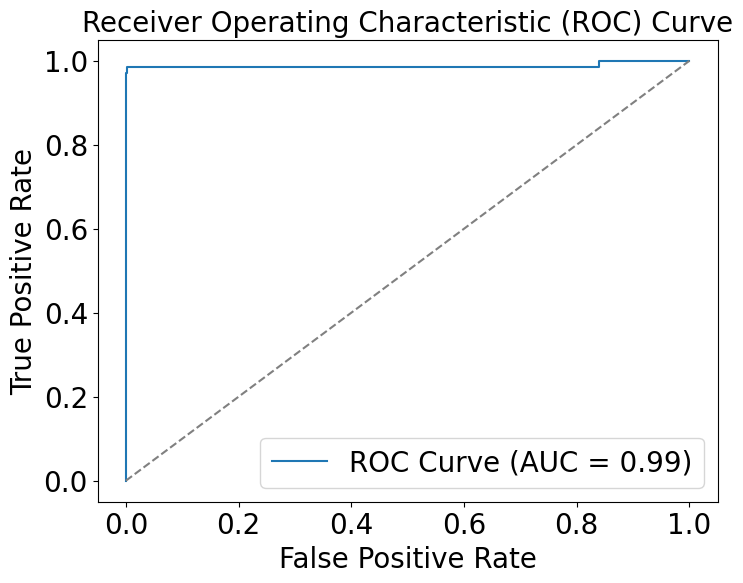

In [309]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming best_estimator is the best model obtained from GridSearchCV
best_model = best_score_params_estimator_gs[0][2]  # Accessing the best estimator

# Train the best model on the entire training set
best_model.fit(X_train, y_train)  # Replace X_train, y_train with your training data

# Predict probabilities on the test set
y_probs = best_model.predict_proba(X_test)[:, 1]  # Replace X_test with your test data

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)  # Replace y_test with your test labels

# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)  # Replace y_test with your test labels

# Plot ROC Curve (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# roc_auc contains the AUC score
# fpr, tpr are arrays containing the points for the ROC curve
